## 데이터 불러오기
- 각 tutor의 클래스별 학생들의 점수를 나열한 것
- Anastasia(N=15), Bernadette(N=18)

In [83]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/harpo.csv")
df.head()

,grade,tutor
0,65,Anastasia
1,72,Bernadette
2,66,Bernadette
3,74,Anastasia
4,73,Anastasia


## 데이터 요약
- 각 클래스 학생들의 데이터 분포 요약
- Group by : 평균, 표편, 몇 명인지.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   grade   33 non-null     int64 
 1   tutor   33 non-null     object
dtypes: int64(1), object(1)
memory usage: 656.0+ bytes


In [85]:
df.groupby('tutor')['grade'].agg(['mean','std','count']).reset_index()

,tutor,mean,std,count
0,Anastasia,74.533333,8.998942,15
1,Bernadette,69.055556,5.774918,18


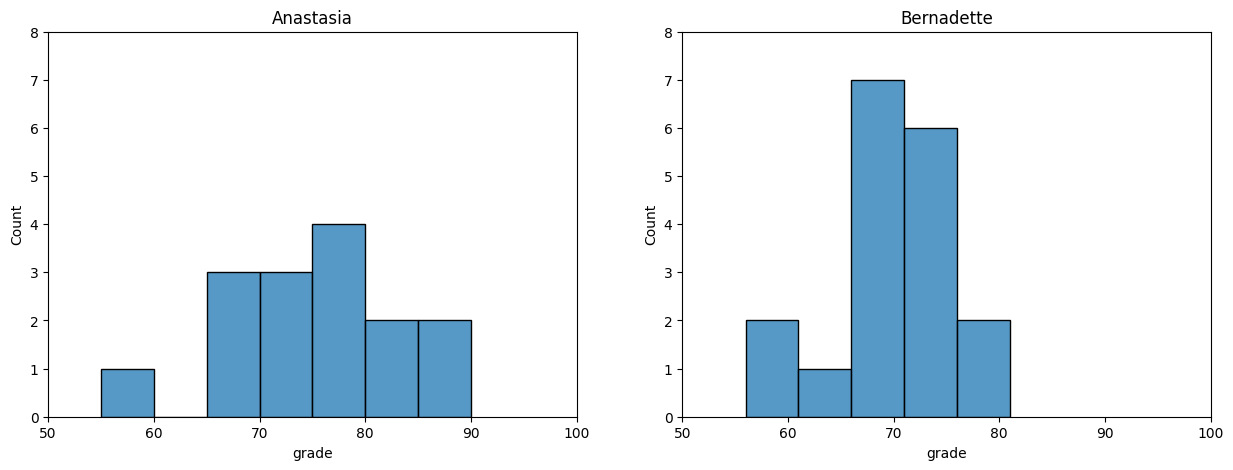

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

Anastasia = pd.DataFrame(df.loc[df['tutor'] == 'Anastasia']['grade']).reset_index(drop=True)
Bernadette = pd.DataFrame(df.loc[df['tutor'] == 'Bernadette']['grade']).reset_index(drop=True)
sns.histplot(Anastasia['grade'], ax = axes[0], binwidth=5)
sns.histplot(Bernadette['grade'], ax = axes[1], binwidth=5)

axes[0].set_xlim(50,100) # x축 설정
axes[1].set_xlim(50,100) # x축 설정

axes[0].set_ylim(0,8) # y축 설정
axes[1].set_ylim(0,8) # y축 설정

axes[0].set_title('Anastasia')
axes[1].set_title('Bernadette')

plt.show()

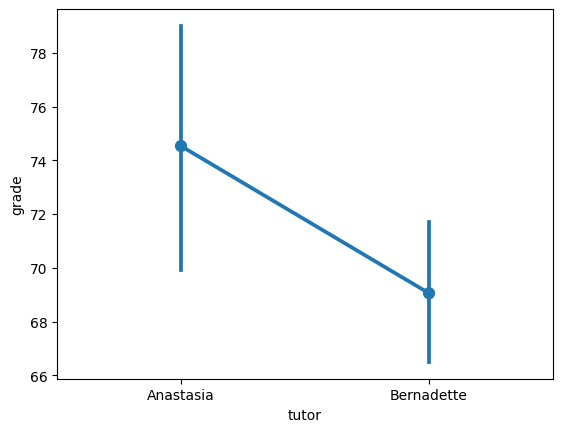

In [87]:
sns.pointplot(x = 'tutor', y = 'grade', data = df)
plt.show()

In [ ]:
!pip install --upgrade pingouin

## 독립표본 T-검정
- 절차 1 : 정규성 검정
- 절차 2 : 등분산성 검정
- 절차 3 :  T test

In [89]:
import pingouin as pg
pg.normality(df, dv='grade', group='tutor')
# p value >= 0.05 귀무가설 기각할 수 없음(귀무가설 채택 = 정규성을 따른다)

,W,pval,normal
tutor,,,
Anastasia,0.981857,0.980597,True
Bernadette,0.969075,0.780127,True


In [90]:
pg.homoscedasticity(data = df , dv='grade', group='tutor')
# p value >= 0.05 귀무가설 기각할 수 없음(귀무가설 채택 = 두 그룹의 분산이 같다, 등분산성)

,W,pval,equal_var
levene,2.128701,0.154622,True


In [91]:
# T test
from pingouin import ttest
ttest(Anastasia['grade'], Bernadette['grade'], correction = False)  # correction=False, 독립표본 T 검정을 하겠다.
# p value >= 0.05 귀무가설 기각(대립가설 채택 = 두 그룹의 평균 차이가 존재한다)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.115432,31,two-sided,0.042529,"[0.2, 10.76]",0.739561,1.755,0.53577


## 실습
- 주어진 데이터(toothgrowth.csv)에는 기니피그 60마리의 치아 길이, 투여한 비타민 C 종류, 투여량이 저장되어 있다.  오렌지주스를 투여받은 기니피그의 치아 길이 평균이 아스코르브산을 투여받은 기니피그의 치아 길이 평균과 일치하는지 t-검정(Two Sample t-test)를 통해 답하고자 한다. 가설은 아래와 같다.  
- 데이터의 변수
    + len : 치아의 길이
    + supp : 투여한 약제(VC: 아스코르브산, OJ: 오렌지주스)
    + does : 투여량

## 문제 1
1. 각 그룹에 대한 표본 평균 계산
2. 귀무가설, 대립가설 설정
3. 정규성 검정, 등분산성 검정 코드를 작성하고, 결과를 해석
4. T-test 진행하여, T-통계량, P-Value 계산
5. 가설검정의 결과를 귀무가설을 기준으로 채택/기각 여부를 판단

조건 : pingouin 라이브러리를 사용하지 말고, scipy 라이브러리만 사용.

In [ ]:
import pandas as pd
import scipy
DF = pd.read_csv('/content/toothgrowth.csv')
DF

In [93]:
# 문제2
DF.groupby('supp')['len'].agg(['mean','std','count']).reset_index()

,supp,mean,std,count
0,OJ,20.663333,6.605561,30
1,VC,16.963333,8.266029,30


## 문제 2
Ho : VC 기니피그와 OJ 기니피그의 치아 길이 평균은 통계적으로 유의한 차이가 없다.   
H1 : VC 기니피그와 OJ 기니피그의 치아 길이 평균은 통계적으로 유의한 차이가 있다.

In [95]:
# 문제 3
# 각 그룹의 표본수가 모두 30 이상일 때, 중심극한 정리에 의해 정규성 가정을 만족했다고 보지만,
# 각 그룹의 표본수가 30 이하일 때, 검정해야하므로.. 30 이상이자 이하이므로 검정을 실시한다.
# feedback=> 이론적으로는 문제 없으므로 미실시
from scipy import stats

# 그룹화된 데이터 가져오기
grouped_data = DF.groupby('supp')['len']

# 각 그룹에 대한 Shapiro-Wilk 정규성 검정 수행
for group_name, group_values in grouped_data:
    statistic, p_value = stats.shapiro(group_values)
    print(f"Group: {group_name}, Statistic: {statistic}, P-value: {p_value}")


Group: OJ, Statistic: 0.917843222618103, P-value: 0.023587485775351524
Group: VC, Statistic: 0.9656713008880615, P-value: 0.4284436106681824


정규성 검정은 CLT에 근거 미실시 하였고, 등분산성 검정을 실시한다.

In [112]:
stats.levene(DF.loc[DF['supp'] == 'VC', 'len'], DF.loc[DF['supp'] == 'OJ', 'len'])

LeveneResult(statistic=1.2135720656945064, pvalue=0.2751764616144053)

In [109]:
t_score, p_value = stats.ttest_ind(DF.loc[DF['supp'] == 'VC', 'len'],
                                  DF.loc[DF['supp'] == 'OJ', 'len'],
                                  equal_var = True)
t_score, p_value

(-1.91526826869527, 0.06039337122412849)

- 두 그룹간 평균 차이가 없음
- 두 그룹간 유의미한 평균차이가 있다고 보기가 어렵다.

# * 통계검정을 시도하기 전 . . .
1. 첫번째 확인 : 가설을 설정
2. 두번째 확인 : 특정 검정을 하기 전 필요한 가정(Assumption)이 뭔지 파악부터 해야한다.

대응표본 T - test
- 체중 측정
- 식단 운동 프로그램

In [149]:
import pandas as pd
df2 = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/chico.csv")
df2.head()

,id,grade_test1,grade_test2
0,student1,42.9,44.6
1,student2,51.8,54.0
2,student3,71.7,72.3
3,student4,51.6,53.4
4,student5,63.5,63.8


In [140]:
df2.describe()


,grade_test1,grade_test2
count,20.000000,20.000000
mean,56.980000,58.385000
std,6.616137,6.405612
min,42.900000,44.600000
25%,51.750000,53.100000
50%,57.700000,59.700000
75%,62.050000,63.050000
max,71.700000,72.300000


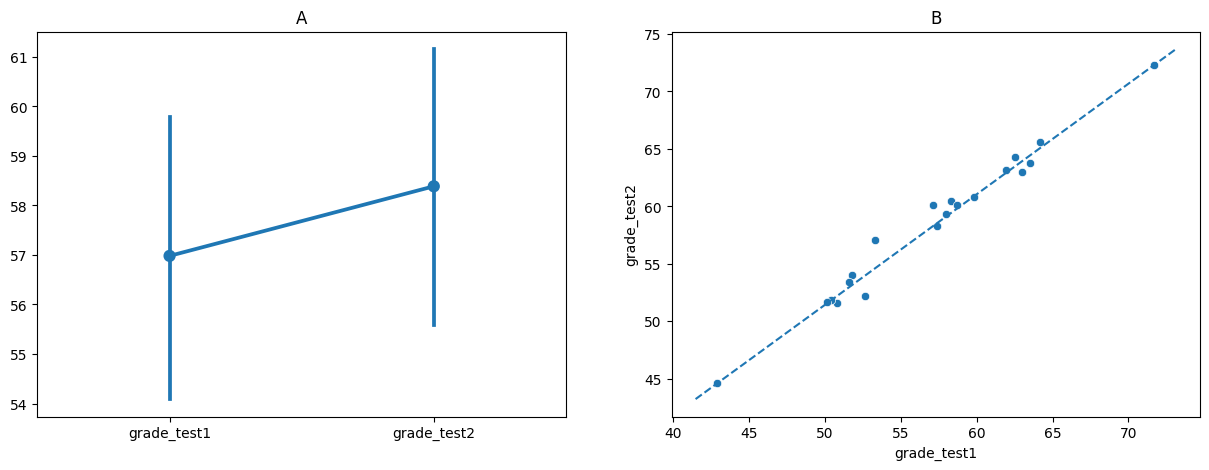

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.pointplot(data = df2, ax=ax[0])
sns.scatterplot(data = df, x='grade_test1', y='grade_test2', ax=ax[1])

ax[1].plot(ax[1].get_xlim(), ax[1].get_ylim(), ls = '--')

ax[0].set_title('A')
ax[1].set_title('B')

plt.show()

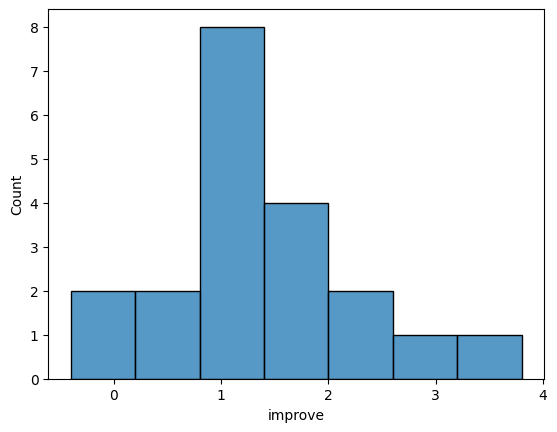

In [143]:
df3 = df2.copy()
df3['improve'] = df3['grade_test2'] - df3['grade_test1']

sns.histplot(data = df3, x='improve')
plt.show()

In [153]:
## pingouin 라이브러리로 정규성 검정하기
import pingouin as pg
pg.normality(df3['improve'])
# p value >= 0.05 귀무가설 기각할 수 없음(귀무가설 채택 = 정규성을 따른다)

,W,pval,normal
improve,0.966399,0.677769,True


In [154]:
from pingouin import ttest
ttest(df3['grade_test2'], df3['grade_test1'], paired=True) # paired=True = 대응표본 검정을 하겠다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.475436,19,two-sided,0.000003,"[0.95, 1.86]",0.215765,5991.577,0.150446


## 문제
- 주어진 데이터(data/insectsprays.csv)에는 여러 지역에서 스프레이를 뿌리기 전에 측정한 곤충의 수와 스프레이를 뿌린 다음의 곤충의 수가 저장되어 있다. 해당 스프레이가 구제 효과가 있는지(즉, 스**프레이를 뿌린 뒤 곤충의 수가 감소했는지**) 대응(쌍체)표본 t-검정(Paired t-test)을 통해 답하고자 한다.
- 문제 1. before_spr과 after_spr의 차이를 확인하여 **diff 변수 로 저장**한다.
- 문제 2. 가설을 설정한다. (귀무가설 & 대립가설)
- 문제 3. 정규성을 확인한다.
- 문제 4. 정규성을 만족하면 ttest 진행 후, t_score, p_value값을 구한다.
- 문제 5. 귀무가설 채택/기각 여부를 확인한다.
- 문제 6. pointplot() 그래프를 작성하여 시각화로 차이 여부를 추가로 확인한다.

In [180]:
import pandas as pd
DF2 = pd.read_csv("/content/insectsprays.csv")
DF2.head()

,before_spr,after_spr
0,10,0
1,7,1
2,20,7
3,14,2
4,14,3


In [183]:
# 문제 1
diff = DF2['after_spr'] - DF2['before_spr']

### 문제2
H0 : 스프레이를 뿌리기 전과 후의 곤충 수는 통계적으로 유의한 차이가 없다.   
H1 : 스프레이를 뿌리기 전과 후의 곤충 수는 통계적으로 유의한 차이가 있다.

# 문제 3
- 중심극한 정리에 근거하여, 정규성을 따른다고 가정하고 이후 과정을 진행한다.

statistic, p_value = stats.shapiro(DF2['diff'])   
statistic, p_value

In [190]:
# 문제 4 정규성을 만족할 때, ttest 진행 후  t 검정 통계량과 p 밸류 구하기
t_score, p_value = stats.ttest_rel(DF2['before_spr'], DF2['after_spr'])
t_score, p_value

(14.893263274163433, 1.0227956957398466e-16)

### 문제 5
p <= 0.5 이므로 귀무가설을 기각한다.

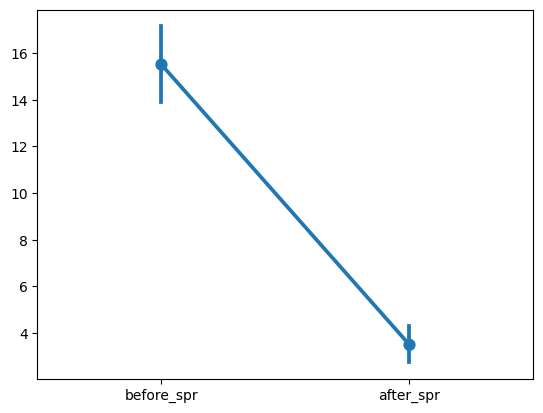

In [191]:
# 문제 6

sns.pointplot(data=DF2)

plt.show()